# Retrieving the positive and negative tweets using emoticons

In [ ]:
import tweepy
import csv
import pandas as pd
####input your credentials here
consumer_key = 'NTsqKPshholLkCEjFuGFCpI3s'
consumer_secret = 'iWBMG1fqMyjQPVXnBIn5mu5pHyINv2oGPrhzcJBVJKysa5cK7G'
access_token = '385036737-uJgf3DM7a7CUYj6Mk2WvHleb6jWJzSXid6tY0ahT'
access_token_secret = 'wZRvuhRiRPqobVXCDAQe0fcjyMr77Q8q1iad3H6YvTQ6G'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('data/tweets_positive', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#bitcoin AND :)",
                           lang="en",
                           since="2018-05-15", until="2018-05-15").items():
    print (tweet.created_at)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

# Reading the positive and negative data

In [1]:
import pandas as pd


file_pos = "data/tweets_positive.csv"
file_neg = "data/tweets_negative.csv"

def read_file(file_name):
    data = pd.read_csv(file_name, encoding = "utf-8",names=['time','tweets'])
    return data
data_pos = read_file(file_pos)
data_neg = read_file(file_neg)



# Assigning labels to the tweets (Positive = 1, Negative = 0)

In [2]:
data_pos['label'] = 1
data_neg['label'] = 0
data_new = pd.concat([data_pos,data_neg])
print("Positive Tweets:",len(data_pos))
print("Negative Tweets:",len(data_neg))

Positive Tweets: 29643
Negative Tweets: 11406


# Data Preprocessing 

## Remove duplicates

In [3]:
#data['tweets_text']= data['tweets'].drop_duplicates()
data = data_new[~data_new.tweets.duplicated()]

data_1 = data[data['label']==1]
data_2 = data[data['label']==0]
data = pd.concat([data_1,data_2])
print("Positive tweets after removal of duplicates:",len(data_1))
print("Negative tweets after removal of duplicates:",len(data_2))
print("Size of the combined data set:",len(data))
#data.to_csv("data/train_data.csv")

Positive tweets after removal of duplicates: 7622
Negative tweets after removal of duplicates: 1759
Size of the combined data set: 9381


## Cleaning the data to remove unnecessary characters and spaces

In [4]:
import re
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\\S+)|([^\x00-\\x80]+)", " ", str(tweet)).split())
    



## Removal of stopwords, punctuation marks and hexadecimal characters

In [5]:
import html.parser
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
def remove_stop_words(data):
    stop_words = set(stopwords.words('english')) 
    stop_words.add('like')
    stop_words.add('retweet')
    stop_words.add('follow')
    stop_words.add("x80")
    stop_words.add("xe2")
    stop_words.add("xa6")
    stop_words.add("xf0")
    stop_words.add("x9f")
    stop_words.add("x82")
    stop_words.add("x98")
    stop_words.add("x82")
    stop_words.add("xad")

    stop_words.add('x00')
    stop_words.add('x01')
    stop_words.add('x02')
    stop_words.add('x03')
    stop_words.add('x04')
    stop_words.add('x05')
    stop_words.add('x06')
    stop_words.add('x07')
    stop_words.add('x08')
    stop_words.add('x09')
    stop_words.add('x0a')
    stop_words.add('x0b')
    stop_words.add('x0c')
    stop_words.add('x0d')
    stop_words.add('x0e')
    stop_words.add('x0f')
    stop_words.add('x10')
    stop_words.add('x11')
    stop_words.add('x12')
    stop_words.add('x13')
    stop_words.add('x14')
    stop_words.add('x15')
    stop_words.add('x16')
    stop_words.add('x17')
    stop_words.add('x18')
    stop_words.add('x19')
    stop_words.add('x1a')
    stop_words.add('x1b')
    stop_words.add('x1c')
    stop_words.add('x1d')
    stop_words.add('x1e')
    stop_words.add('x1f')
    stop_words.add('x20')
    stop_words.add('x21')
    stop_words.add('x22')
    stop_words.add('x23')
    stop_words.add('x24')
    stop_words.add('x25')
    stop_words.add('x26')
    stop_words.add('x27')
    stop_words.add('x28')
    stop_words.add('x29')
    stop_words.add('x2a')
    stop_words.add('x2b')
    stop_words.add('x2c')
    stop_words.add('x2d')
    stop_words.add('x2e')
    stop_words.add('x2f')
    stop_words.add('x30')
    stop_words.add('x31')
    stop_words.add('x32')
    stop_words.add('x33')
    stop_words.add('x34')
    stop_words.add('x35')
    stop_words.add('x36')
    stop_words.add('x37')
    stop_words.add('x38')
    stop_words.add('x39')
    stop_words.add('x3a')
    stop_words.add('x3b')
    stop_words.add('x3c')
    stop_words.add('x3d')
    stop_words.add('x3e')
    stop_words.add('x3f')
    stop_words.add('x40')
    stop_words.add('x41')
    stop_words.add('x42')
    stop_words.add('x43')
    stop_words.add('x44')
    stop_words.add('x45')
    stop_words.add('x46')
    stop_words.add('x47')
    stop_words.add('x48')
    stop_words.add('x49')
    stop_words.add('x4a')
    stop_words.add('x4b')
    stop_words.add('x4c')
    stop_words.add('x4d')
    stop_words.add('x4e')
    stop_words.add('x4f')
    stop_words.add('x50')
    stop_words.add('x51')
    stop_words.add('x52')
    stop_words.add('x53')
    stop_words.add('x54')
    stop_words.add('x55')
    stop_words.add('x56')
    stop_words.add('x57')
    stop_words.add('x58')
    stop_words.add('x59')
    stop_words.add('x5a')
    stop_words.add('x5b')
    stop_words.add('x5c')
    stop_words.add('x5d')
    stop_words.add('x5e')
    stop_words.add('x5f')
    stop_words.add('x60')
    stop_words.add('x61')
    stop_words.add('x62')
    stop_words.add('x63')
    stop_words.add('x64')
    stop_words.add('x65')
    stop_words.add('x66')
    stop_words.add('x67')
    stop_words.add('x68')
    stop_words.add('x69')
    stop_words.add('x6a')
    stop_words.add('x6b')
    stop_words.add('x6c')
    stop_words.add('x6d')
    stop_words.add('x6e')
    stop_words.add('x6f')
    stop_words.add('x70')
    stop_words.add('x71')
    stop_words.add('x72')
    stop_words.add('x73')
    stop_words.add('x74')
    stop_words.add('x75')
    stop_words.add('x76')
    stop_words.add('x77')
    stop_words.add('x78')
    stop_words.add('x79')
    stop_words.add('x7a')
    stop_words.add('x7b')
    stop_words.add('x7c')
    stop_words.add('x7d')
    stop_words.add('x7e')
    stop_words.add('x7f')
    stop_words.add('x80')
    stop_words.add('x81')
    stop_words.add('x82')
    stop_words.add('x83')
    stop_words.add('x84')
    stop_words.add('x85')
    stop_words.add('x86')
    stop_words.add('x87')
    stop_words.add('x88')
    stop_words.add('x89')
    stop_words.add('x8a')
    stop_words.add('x8b')
    stop_words.add('x8c')
    stop_words.add('x8d')
    stop_words.add('x8e')
    stop_words.add('x8f')
    stop_words.add('x90')
    stop_words.add('x91')
    stop_words.add('x92')
    stop_words.add('x93')
    stop_words.add('x94')
    stop_words.add('x95')
    stop_words.add('x96')
    stop_words.add('x97')
    stop_words.add('x98')
    stop_words.add('x99')
    stop_words.add('x9a')
    stop_words.add('x9b')
    stop_words.add('x9c')
    stop_words.add('x9d')
    stop_words.add('x9e')
    stop_words.add('x9f')
    stop_words.add('xa0')
    stop_words.add('xa1')
    stop_words.add('xa2')
    stop_words.add('xa3')
    stop_words.add('xa4')
    stop_words.add('xa5')
    stop_words.add('xa6')
    stop_words.add('xa7')
    stop_words.add('xa8')
    stop_words.add('xa9')
    stop_words.add('xaa')
    stop_words.add('xab')
    stop_words.add('xac')
    stop_words.add('xad')
    stop_words.add('xae')
    stop_words.add('xaf')
    stop_words.add('xb0')
    stop_words.add('xb1')
    stop_words.add('xb2')
    stop_words.add('xb3')
    stop_words.add('xb4')
    stop_words.add('xb5')
    stop_words.add('xb6')
    stop_words.add('xb7')
    stop_words.add('xb8')
    stop_words.add('xb9')
    stop_words.add('xba')
    stop_words.add('xbb')
    stop_words.add('xbc')
    stop_words.add('xbd')
    stop_words.add('xbe')
    stop_words.add('xbf')
    stop_words.add('xc0')
    stop_words.add('xc1')
    stop_words.add('xc2')
    stop_words.add('xc3')
    stop_words.add('xc4')
    stop_words.add('xc5')
    stop_words.add('xc6')
    stop_words.add('xc7')
    stop_words.add('xc8')
    stop_words.add('xc9')
    stop_words.add('xca')
    stop_words.add('xcb')
    stop_words.add('xcc')
    stop_words.add('xcd')
    stop_words.add('xce')
    stop_words.add('xcf')
    stop_words.add('xd0')
    stop_words.add('xd1')
    stop_words.add('xd2')
    stop_words.add('xd3')
    stop_words.add('xd4')
    stop_words.add('xd5')
    stop_words.add('xd6')
    stop_words.add('xd7')
    stop_words.add('xd8')
    stop_words.add('xd9')
    stop_words.add('xda')
    stop_words.add('xdb')
    stop_words.add('xdc')
    stop_words.add('xdd')
    stop_words.add('xde')
    stop_words.add('xdf')
    stop_words.add('xe0')
    stop_words.add('xe1')
    stop_words.add('xe2')
    stop_words.add('xe3')
    stop_words.add('xe4')
    stop_words.add('xe5')
    stop_words.add('xe6')
    stop_words.add('xe7')
    stop_words.add('xe8')
    stop_words.add('xe9')
    stop_words.add('xea')
    stop_words.add('xeb')
    stop_words.add('xec')
    stop_words.add('xed')
    stop_words.add('xee')
    stop_words.add('xef')
    stop_words.add('xf0')
    stop_words.add('xf1')
    stop_words.add('xf2')
    stop_words.add('xf3')
    stop_words.add('xf4')
    stop_words.add('xf5')
    stop_words.add('xf6')
    stop_words.add('xf7')
    stop_words.add('xf8')
    stop_words.add('xf9')
    stop_words.add('xfa')
    stop_words.add('xfb')
    stop_words.add('xfc')
    stop_words.add('xfd')
    stop_words.add('xfe')
    stop_words.add('xff')

    printable = set(string.printable)
    html_parser = html.parser.HTMLParser()
    c = 0
    filtered_tweets = []
    for t in data['tweets']:

        #tweet = i.decode("utf-16")
        tweet = t.replace('\\n',"")
        tweet =  clean_tweet(tweet)
        word_tokens = word_tokenize(tweet)
        #print(clean_tweet(word_tokens))
        filtered = ' '.join([w.translate(str.maketrans(' ', ' ', string.punctuation)).lower().replace("rt","") for w in word_tokens[1:] if w.lower() not in stop_words and w.isalpha()])
        filtered_tweets.append((filtered))
    return filtered_tweets
        #@[A-Za-z0-9]+)|([^0-9A-Za-z \t])
        #print(filtered)
        #print(tweet.encode("ascii", errors="ignore").decode())
        #tweet = ''.join(i for i in filter(lambda x: x in printable,i))


    

In [6]:
filtered_tweets = remove_stop_words(data)
filtered_tweets

[' new billboards outside warren buffetts office genesismining bitcoin bitcoinawareness',
 ' thanks much voting helped win two awards last night influencer year amp relatable nice',
 ' great friday autobayers sta making plans weekend friday fridayfeeling fridaymotivation ico',
 'checked registration open preregistration hurry',
 ' bancor twitter bitcoin cryptocurrency etherum blockchain ico',
 ' rafique call crypto king proud pakistan may allah bless brother aameen cryptocurrency bitcoin co',
 ' howeycoins ico scam education siteprepared sec know crypto infrastructure gogreen sesdeepstate ped',
 ' kimeraagi sold token already tokensale check ai ico late bitcoin blockchai',
 ' hot new pre sale crypto ico',
 'bitcoin minor ios maybe reason iphone need charge often apple',
 'come visit booth thurs may sat may take picture cryptocoincon',
 'tweets cryptocandy shoots price mo',
 'good story hope bitcoin crypto cryptocurrency blockchain digibyte dgb',
 'want announce recently added gainers l

# WordCloud Visualization

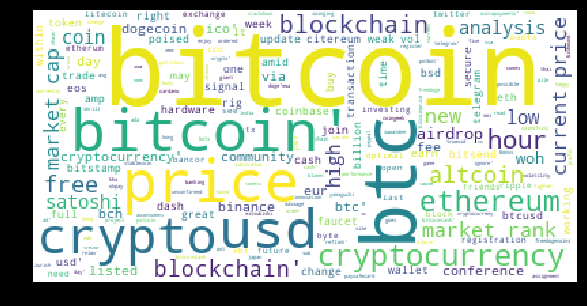

In [7]:
import re
import random
from nltk.corpus import stopwords
from IPython.display import display
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from wordcloud import WordCloud
pd.options.display.max_columns = 10000
import string

def form_wc(data):
    count_all = Counter()
    count_all.update(data)
        
    wordcloud = WordCloud(background_color="white").generate(str(count_all.most_common(80)))

    plt.figure( figsize=(10,5), facecolor='k')
    plt.axis("off")
    plt.imshow(wordcloud)

form_wc(filtered_tweets)



# Creating a frequency matrix 
Basically Count_Vectorizer.Transform() function creates such frequency matrix

In [8]:
pd.set_option('display.max_columns', 500)
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit((filtered_tweets))
doc_array = count_vector.transform(filtered_tweets).toarray()
doc_array
frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names())
frequency_matrix.head()

,aaaaahhh,aameen,ab,abassi,abc,abd,ability,able,abo,abou,abra,abroad,abruptly,absolute,absolutely,absurd,abt,abusing,abx,ac,academic,academy,acc,accelerated,accelerates,accept,acceptable,acceptance,accepted,accepting,accepts,acceptscrypto,acceptslitecoin,access,accessible,accommodation,accomodation,accomplish,accomplished,according,accoun,account,accountability,accounted,accountfor,accountforsale,accounting,accounts,accredited,accruals,acctbalancechalange,accumulate,accumulated,accumulating,accuracy,accurate,accusations,accused,achain,achieve,achieving,acm,aco,acorn,acquaintances,acquire,acquired,acquisition,acr,acre,acres,across,act,acting,action,actions,activates,activation,active,actively,activities,activity,activos,actn,actors,acts,actua,actual,actually,ad,ada,adam,adaptabi,add,added,addiction,adding,addition,additional,addres,address,addresses,addressing,addresswinner,adds,adena,adess,adet,adi,adieu,adjusted,admi,admin,administrator,admins,admirable,admire,admired,admit,admitted,admp,admper,adopt,adopted,adopters,adopting,adoption,adopts,adres,adress,adresses,ads,adt,adult,advan,advance,advanced,advancement,advancements,advances,advantage,advantages,advei,adveisement,adveising,adventage,adventure,adventures,adversity,advice,advis,advise,advisers,advisor,advisors,advisory,advocacy,advocates,advocating,aegeus,aelf,aelfblockchain,aeon,aero,aeron,aest,af,afelicoin,affcode,affect,affection,affects,affiliate,affiliates,affinity,affirmed,afford,affordable,afotc,afraid,africa,africans,aftehought,aftermath,afternic,ag,aga,againcofveve,age,agencies,agency,agenda,agents,ages,agg,aggregate,aggregated,agi,agile,agm,ago,agony,agree,agreements,agrees,ah,ahead,ahur,ai,aichip,aicle,aicles,aiclick,aiculated,aid,aidcoin,aidecentralized,aificial,aificialintelligence,aificially,aifiicialintelligence,aiforgood,aim,aimed,aimedis,aimediswoh,aiming,aims,aint,aioken,aion,aiqox,air,aird,airdrop,airdropale,airdropales,airdropclick,airdropdatecoin,airdropfriends,airdropfriendsprobably,airdroping,airdropnew,airdropped,airdroppin,airdropping,airdrops,airdropsalfa,airfox,airplane,...,wondered,wonderful,wondering,wonderous,wood,woooon,woooooooow,wor,word,wordbot,wordpress,words,work,worked,workforbitcoins,workforbtc,workfromhome,working,workout,workplace,works,workshop,world,worldbuilding,worldcoin,worldcore,worldcryptocon,worldex,worldintelligenceconference,worlds,worldstill,worldunion,worldwide,worldwideyou,worried,worries,worry,worrying,worse,worst,woul,would,wow,wowing,woww,woz,wozniak,wozniakclick,wrap,wrfx,wright,write,writer,writes,writing,written,wrong,wrote,wsj,wtf,wtfiranian,wtfudk,wth,wu,wuhan,wutang,wxy,wyckoff,wyoming,xaas,xabi,xabmore,xada,xadv,xafgo,xain,xap,xapo,xb,xbalink,xbathere,xbbbitcoin,xbblet,xbbtoday,xbcan,xbcblue,xbcbtc,xbcnayd,xbdinvestors,xbdshow,xbegreat,xbelink,xbereq,xbfeveryone,xbfprops,xbfuy,xbt,xbtdirection,xbteur,xbtmoney,xbtr,xbtusd,xchangerate,xcurrent,xdac,xel,xem,xilinx,xl,xle,xlf,xlinkbot,xlm,xlr,xmn,xmoneta,xmr,xnm,xovercoin,xoxo,xp,xperience,xpring,xr,xra,xradip,xrapid,xrb,xriba,xrouter,xrp,xrpbuy,xrpthestandard,xrpusd,xsn,xspec,xt,xtl,xtra,xtrade,xtz,xunlei,xvg,xvgfam,xvgmag,xwc,xx,xy,xyo,xyz,ya,yacht,yachtiboys,yahoo,yall,yamaguchi,yang,yanni,yanny,yannyvslaurel,yay,yea,yeadomain,yeah,yeahh,yeahhh,year,yearofthedog,years,yeay,yen,yermack,yes,yessir,yeste,yesterday,yesterdays,yet,yield,yields,yin,yo,yobit,yoda,yodajedimastar,york,yos,youcanbuyafractionofabitcoin,young,youngking,younk,younus,youth,youtube,youtuber,yr,yt,yu,yum,yumerium,yumoto,yvxlnv,za,zald,zan,zancoin,zb,zcash,zcashthe,zcl,zclassic,zebpay,zec,zelcash,zen,zencash,zenoblock,zero,zerocarbonproject,zerotell,zetacoin,zh,zhash,zig,ziglar,zil,ziliqa,zilliqua,zimbabwe,znc,zny,zoc,zoi,zone,zones,zoom,zoomed,zooming,zpool,zrx,zrxbtc,zrxusd,zucco,zuckerberg,zuckerman,zumminer,zurich,zxr,zynq,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Assigning the clean tweets to the data

In [9]:
data['tweets'] = filtered_tweets



## Creation of features and labels 

In [10]:
features = data['tweets']
labels = data['label']

## Sample features

In [11]:
pd.set_option('display.max_columns', 500)
features[1:10]

2      thanks much voting helped win two awards last...
6      great friday autobayers sta making plans week...
8       checked registration open preregistration hurry
9      bancor twitter bitcoin cryptocurrency etherum...
17     rafique call crypto king proud pakistan may a...
20     howeycoins ico scam education siteprepared se...
21     kimeraagi sold token already tokensale check ...
24                          hot new pre sale crypto ico
32    bitcoin minor ios maybe reason iphone need cha...
Name: tweets, dtype: object

# Stratified k-fold Cross validation and Training the data

## Multinomial Naive Bayes

In [12]:
import collections
import nltk.classify.util, nltk.metrics
import itertools
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
def k_fold_cv(features,labels,n):
    kf = StratifiedKFold(n_splits=n)
    i = 1
    for train_index, test_index in kf.split(features,labels):
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print(train_index[0], test_index[0])
        #print(data_set[train_index])
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
        count_vect = CountVectorizer()
        X_train_counts = count_vect.fit_transform(X_train)
        text_clf = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', MultinomialNB())])

        text_clf.fit(X_train, y_train)  
        predicted = text_clf.predict(X_test)
        print("For k = ", format(i))
        print('Accuracy:',accuracy_score(predicted,y_test))
        print('F1 score: ', format(f1_score(y_test, predicted)))
        print('Precision: ', format(precision_score(y_test, predicted)))
        print('Recall: ', format(recall_score(y_test, predicted)))
        i += 1
    return text_clf
    #X_train_counts = count_vect.fit_transform(twenty_train.data)
    #print(X_train,y_train)

### k = 5

In [13]:
clf_5 = k_fold_cv(features,labels,5)

For k =  1
Accuracy: 0.835375599361
F1 score:  0.907733651836369
Precision:  0.8333333333333334
Recall:  0.9967213114754099
For k =  2
Accuracy: 0.842834310069
F1 score:  0.9112247968702979
Precision:  0.8420467185761957
Recall:  0.9927868852459016
For k =  3
Accuracy: 0.824626865672
F1 score:  0.9024607174621999
Precision:  0.8231476473769606
Recall:  0.9986876640419947
For k =  4
Accuracy: 0.821961620469
F1 score:  0.9008313539192399
Precision:  0.8226681127982647
Recall:  0.9954068241469817
For k =  5
Accuracy: 0.820266666667
F1 score:  0.899851411589896
Precision:  0.8223791417707768
Recall:  0.9934383202099738


### k =10

In [14]:
clf_10 = k_fold_cv(features,labels,10)

For k =  1
Accuracy: 0.841320553781
F1 score:  0.9109384339509862
Precision:  0.8373626373626374
Recall:  0.9986893840104849
For k =  2
Accuracy: 0.837060702875
F1 score:  0.9082183563287342
Precision:  0.8373893805309734
Recall:  0.9921363040629095
For k =  3
Accuracy: 0.847547974414
F1 score:  0.9139072847682119
Precision:  0.8442714126807565
Recall:  0.9960629921259843
For k =  4
Accuracy: 0.850746268657
F1 score:  0.9157641395908543
Precision:  0.8455555555555555
Recall:  0.9986876640419947
For k =  5
Accuracy: 0.828358208955
F1 score:  0.9043374925727867
Precision:  0.8262757871878393
Recall:  0.9986876640419947
For k =  6
Accuracy: 0.826226012793
F1 score:  0.9030339083878643
Precision:  0.8258977149075082
Recall:  0.9960629921259843
For k =  7
Accuracy: 0.827292110874
F1 score:  0.9033412887828163
Precision:  0.8282275711159738
Recall:  0.9934383202099738
For k =  8
Accuracy: 0.826226012793
F1 score:  0.9030339083878643
Precision:  0.8258977149075082
Recall:  0.9960629921259843


## MaxEnt Classifier

In [15]:
def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

import collections
import nltk.classify.util, nltk.metrics
from nltk.classify import MaxentClassifier
from nltk.corpus import movie_reviews
from nltk.metrics import scores
from nltk import precision
import itertools
from nltk.collocations import BigramCollocationFinder
from sklearn.naive_bayes import MultinomialNB
from nltk.metrics import BigramAssocMeasures
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score
def k_fold_cv_max(features,labels,n):
    kf = StratifiedKFold(n_splits=n)
    j = 1
    for train_index, test_index in kf.split(features,labels):
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print(train_index[0], test_index[0])
        #print(data_set[train_index])
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
        train_feats = [(list_to_dict(word_tokenize(i)), j) for i,j in zip(X_train,y_train)]
        test_feats = [(list_to_dict(word_tokenize(i)), j) for i,j in zip(X_test,y_test)]
        classifier = MaxentClassifier.train(train_feats,algorithm='IIS',max_iter=50)
        print(classifier)
        refsets = collections.defaultdict(set)
        testsets = collections.defaultdict(set)
        print(classifier)
        predicted = []
        for i, (feats, label) in enumerate(test_feats):
                    refsets[label].add(i)
                    observed = classifier.classify(feats)
                    predicted.append(observed)
                    testsets[observed].add(i)
        evaluationMetrics={}
        classifier.show_most_informative_features()
        evaluationMetrics['model']=classifier
        #evaluationMetrics['trainingData']=train_feats
        print("For k =",j)
        evaluationMetrics['accuracy']=nltk.classify.util.accuracy(classifier, test_feats)
        evaluationMetrics['posPrec']=nltk.precision(refsets[1], testsets[1])
        evaluationMetrics['posRecall']=nltk.recall(refsets[1], testsets[1])
        evaluationMetrics['posF_Score']=nltk.f_measure(refsets[1], testsets[1])
        evaluationMetrics['negPrec']=nltk.precision(refsets[0], testsets[0])
        evaluationMetrics['negRecall']=nltk.recall(refsets[0], testsets[0])
        evaluationMetrics['negF_Score']=nltk.f_measure(refsets[0], testsets[0])

        print(evaluationMetrics)
        j += 1
    return classifier

    

### k = 5

In [16]:
max_ent_clf_5 = k_fold_cv_max(features,labels,5)
max_ent_clf_5

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.812
             2          -0.30170        0.846
             3          -0.23298        0.936
             4          -0.19153        0.955
             5          -0.16394        0.965
             6          -0.14407        0.972
             7          -0.12898        0.977
             8          -0.11707        0.980
             9          -0.10739        0.982
            10          -0.09937        0.984
            11          -0.09259        0.986
            12          -0.08678        0.987
            13          -0.08175        0.987
            14          -0.07734        0.988
            15          -0.07344        0.989
            16          -0.06997        0.989
            17          -0.06686        0.990
            18          -0.06405        0.990
            19          -0.06150        0.991
  

            36          -0.04429        0.992
            37          -0.04348        0.992
            38          -0.04271        0.992
            39          -0.04196        0.993
            40          -0.04126        0.993
            41          -0.04058        0.993
            42          -0.03993        0.993
            43          -0.03930        0.993
            44          -0.03870        0.993
            45          -0.03812        0.993
            46          -0.03757        0.993
            47          -0.03703        0.993
            48          -0.03652        0.993
            49          -0.03602        0.993
         Final          -0.03554        0.993
<ConditionalExponentialClassifier: 2 labels, 12006 features>
<ConditionalExponentialClassifier: 2 labels, 12006 features>
   9.941 inventor==True and label is 1
   7.362 swachhcoin==True and label is 0
   7.202 madhouse==True and label is 0
   6.822 granny==True and label is 0
  -6.618 current==True and label

<ConditionalExponentialClassifier: 2 labels, 11959 features>

In [17]:
max_ent_clf_10 = k_fold_cv_max(features,labels,10)
max_ent_clf_10

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.812
             2          -0.30133        0.843
             3          -0.23546        0.927
             4          -0.19494        0.951
             5          -0.16771        0.960
             6          -0.14797        0.967
             7          -0.13289        0.973
             8          -0.12094        0.977
             9          -0.11120        0.979
            10          -0.10309        0.982
            11          -0.09623        0.983
            12          -0.09033        0.985
            13          -0.08521        0.986
            14          -0.08071        0.987
            15          -0.07673        0.987
            16          -0.07319        0.988
            17          -0.07000        0.988
            18          -0.06712        0.989
            19          -0.06451        0.989
  

            36          -0.04539        0.991
            37          -0.04457        0.991
            38          -0.04380        0.991
            39          -0.04306        0.991
            40          -0.04235        0.991
            41          -0.04167        0.991
            42          -0.04102        0.991
            43          -0.04039        0.991
            44          -0.03979        0.992
            45          -0.03921        0.992
            46          -0.03866        0.992
            47          -0.03812        0.992
            48          -0.03761        0.992
            49          -0.03711        0.992
         Final          -0.03663        0.992
<ConditionalExponentialClassifier: 2 labels, 12881 features>
<ConditionalExponentialClassifier: 2 labels, 12881 features>
   9.623 inventor==True and label is 1
   7.374 granny==True and label is 0
   6.572 registrations==True and label is 0
   6.515 altcoinssignals==True and label is 1
  -6.497 current==True

             3          -0.23970        0.917
             4          -0.20023        0.944
             5          -0.17343        0.954
             6          -0.15389        0.963
             7          -0.13891        0.968
             8          -0.12700        0.971
             9          -0.11726        0.975
            10          -0.10914        0.978
            11          -0.10224        0.979
            12          -0.09631        0.981
            13          -0.09115        0.982
            14          -0.08661        0.983
            15          -0.08259        0.983
            16          -0.07900        0.985
            17          -0.07577        0.986
            18          -0.07284        0.986
            19          -0.07019        0.987
            20          -0.06776        0.987
            21          -0.06554        0.987
            22          -0.06349        0.987
            23          -0.06159        0.988
            24          -0.05984  

            41          -0.04207        0.991
            42          -0.04141        0.991
            43          -0.04078        0.991
            44          -0.04018        0.991
            45          -0.03960        0.992
            46          -0.03904        0.992
            47          -0.03850        0.992
            48          -0.03798        0.992
            49          -0.03748        0.992
         Final          -0.03700        0.992
<ConditionalExponentialClassifier: 2 labels, 12765 features>
<ConditionalExponentialClassifier: 2 labels, 12765 features>
  10.318 inventor==True and label is 1
   8.720 swachhcoin==True and label is 0
  -6.600 current==True and label is 0
   6.552 madhouse==True and label is 0
   6.276 cryptoping==True and label is 0
   5.986 altcoinssignals==True and label is 1
  -5.902 xbt==True and label is 1
   5.894 tronics==True and label is 0
   5.751 hoe==True and label is 0
   5.644 njpw==True and label is 1
For k = 937
{'model': <Conditiona

<ConditionalExponentialClassifier: 2 labels, 12752 features>

# Testing the data

## Reading the test data

In [19]:
test_data = pd.read_csv("data/test.csv",encoding = "ISO-8859-1")
test_data.dropna(axis=1).head()

,Time,tweets,Labels
0,5/15/18 23:58,__ #BEAR | X #NYSE #Specialist | #Charts | #...,1
1,5/15/18 23:10,__«_______äé Dad Hats __«_______äé\r...,1
2,5/15/18 23:45,___HTC Exodus to Be _óWorld__s First Native...,1
3,5/15/18 23:38,______ The community needs your support to g...,1
4,5/15/18 23:48,____ AirdropToYou\r\r U P D A T E ...,1


## Preprocessing, cleaning the test data and dividing the test set into features and labels

In [20]:
filtered_test_tweets = remove_stop_words(test_data)
test_data['tweets'] = filtered_test_tweets
features_test,labels_test = test_data['tweets'],test_data['Labels']


In [21]:
def testing_maxent(classifier,features_test,labels_tests):
    test_features = [(list_to_dict(word_tokenize(i)),j) for i,j in zip(features_test,labels_test)]

    ref_test= collections.defaultdict(set)
    tests = collections.defaultdict(set)
    print(classifier)
    predicted = []
    for i, (feats, label) in enumerate(test_features):
        ref_test[label].add(i)
        observed_tests = classifier.classify(feats)
        predicted.append(observed_tests)
        tests[observed_tests].add(i)
    evaluationMetrics_test={}
    classifier.show_most_informative_features()
    evaluationMetrics_test['model']=classifier
    #evaluationMetrics['trainingData']=train_feats
    evaluationMetrics_test['accuracy']=nltk.classify.util.accuracy(classifier, test_features)
    evaluationMetrics_test['posPrec']=nltk.precision(ref_test[1], tests[1])
    evaluationMetrics_test['posRecall']=nltk.recall(ref_test[1], tests[1])
    evaluationMetrics_test['posF_Score']=nltk.f_measure(ref_test[1], tests[1])
    evaluationMetrics_test['negPrec']=nltk.precision(ref_test[0], tests[0])
    evaluationMetrics_test['negRecall']=nltk.recall(ref_test[0], tests[0])
    evaluationMetrics_test['negF_Score']=nltk.f_measure(ref_test[0], tests[0])

    print(evaluationMetrics_test)

## Testing with MaxEnt for k = 5

In [22]:
testing_maxent(max_ent_clf_5,features_test,labels_test)

<ConditionalExponentialClassifier: 2 labels, 11959 features>
  10.160 inventor==True and label is 1
   8.488 swachhcoin==True and label is 0
   8.272 granny==True and label is 0
   6.431 madhouse==True and label is 0
   6.311 mys==True and label is 0
  -6.254 current==True and label is 0
   6.017 altcoinssignals==True and label is 1
  -5.981 satoshi==True and label is 1
  -5.679 xbt==True and label is 1
   5.644 njpw==True and label is 1
{'model': <ConditionalExponentialClassifier: 2 labels, 11959 features>, 'accuracy': 0.8392156862745098, 'posPrec': 0.8765432098765432, 'posRecall': 0.9508928571428571, 'posF_Score': 0.9122055674518201, 'negPrec': 0.08333333333333333, 'negRecall': 0.03225806451612903, 'negF_Score': 0.046511627906976744}


## Testing wit MaxEnt  for k =10

In [23]:
testing_maxent(max_ent_clf_10,features_test,labels_test)

<ConditionalExponentialClassifier: 2 labels, 12752 features>
  10.442 inventor==True and label is 1
   8.689 swachhcoin==True and label is 0
   8.101 granny==True and label is 0
   6.466 madhouse==True and label is 0
  -6.424 current==True and label is 0
   6.276 mys==True and label is 0
   6.110 evaluation==True and label is 0
   6.009 altcoinssignals==True and label is 1
  -5.904 satoshi==True and label is 1
  -5.802 xbt==True and label is 1
{'model': <ConditionalExponentialClassifier: 2 labels, 12752 features>, 'accuracy': 0.8352941176470589, 'posPrec': 0.8729508196721312, 'posRecall': 0.9508928571428571, 'posF_Score': 0.9102564102564104, 'negPrec': 0.0, 'negRecall': 0.0, 'negF_Score': 0}


## Testing with Multinomial Naive Bayes for k = 5

In [24]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
predicted = clf_5.predict(features_test)
print('Accuracy:',accuracy_score(predicted,labels_test))
print('Precision:',precision_score(predicted,labels_test))
print('Recall:',recall_score(predicted,labels_test))

print('F1 score: ', format(f1_score(labels_test, predicted)))

Accuracy: 0.862745098039
Precision: 0.982142857143
Recall: 0.876494023904
F1 score:  0.9263157894736842


## Testing with Multinomial Naive Bayes for k = 10

In [25]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
predicted = clf_5.predict(features_test)
print('Accuracy:',accuracy_score(predicted,labels_test))
print('Precision:',precision_score(predicted,labels_test))
print('Recall:',recall_score(predicted,labels_test))

print('F1 score: ', format(f1_score(labels_test, predicted)))

Accuracy: 0.862745098039
Precision: 0.982142857143
Recall: 0.876494023904
F1 score:  0.9263157894736842


### Predicting the labels of the data from May 08-May 20 to compare with Bitcoin Price change

In [48]:
data_08 = pd.read_csv("data/tweets_08.csv", encoding = "ISO-8859-1")
data_09 = pd.read_csv("data/tweets_09.csv", encoding = "ISO-8859-1")


In [50]:
data_08 = data_08[['tweets','time']]
data_09 = data_09[['tweets','time']]

In [51]:
data_10 = pd.read_csv("data/tweets_10.csv", encoding = "utf-8",names=['time','tweets'])
data_11 = pd.read_csv("data/tweets_11.csv", encoding = 'utf-8',names=['time','tweets'])
data_12= pd.read_csv('data/tweets_12.csv', encoding = 'utf-8',names=['time','tweets'])
data_13= pd.read_csv('data/tweets_13.csv', encoding = 'utf-8',names=['time','tweets'])
data_14= pd.read_csv('data/tweets_14.csv', encoding = 'utf-8',names=['time','tweets'])
data_15= pd.read_csv('data/tweets_15.csv', encoding = 'utf-8',names=['time','tweets'])
data_16= pd.read_csv('data/tweets_16.csv', encoding = 'utf-8',names=['time','tweets'])
data_17= pd.read_csv('data/tweets_17.csv', encoding = 'utf-8',names=['time','tweets'])
data_18= pd.read_csv('data/tweets_18.csv', encoding = 'utf-8',names=['time','tweets'])
data_19= pd.read_csv('data/tweets_19.csv', encoding = 'utf-8',names=['time','tweets'])
data_20= pd.read_csv('data/tweets_20.csv', encoding = 'utf-8',names=['time','tweets'])

In [52]:
def test_preprocessing(data):
    
    filtered_test_tweets = remove_stop_words(data)
    return filtered_test_tweets
filtered_test_tweets_08 = test_preprocessing(data_08)
filtered_test_tweets_09 = test_preprocessing(data_09)
filtered_test_tweets_10 = test_preprocessing(data_10)
filtered_test_tweets_11 = test_preprocessing(data_11)
filtered_test_tweets_12 = test_preprocessing(data_12)
filtered_test_tweets_13 = test_preprocessing(data_13)
filtered_test_tweets_14 = test_preprocessing(data_14)
filtered_test_tweets_15 = test_preprocessing(data_15)
filtered_test_tweets_16 = test_preprocessing(data_16)
filtered_test_tweets_17 = test_preprocessing(data_17)
filtered_test_tweets_18 = test_preprocessing(data_18)
filtered_test_tweets_19 = test_preprocessing(data_19)
filtered_test_tweets_20 = test_preprocessing(data_20)

In [53]:

data_08['tweets'] = filtered_test_tweets_08
data_09['tweets'] = filtered_test_tweets_09
data_10['tweets'] = filtered_test_tweets_10
data_11['tweets'] = filtered_test_tweets_11
data_12['tweets'] = filtered_test_tweets_12
data_13['tweets'] = filtered_test_tweets_13
data_14['tweets'] = filtered_test_tweets_14
data_15['tweets'] = filtered_test_tweets_15
data_16['tweets'] = filtered_test_tweets_16
data_17['tweets'] = filtered_test_tweets_17
data_18['tweets'] = filtered_test_tweets_18
data_19['tweets'] = filtered_test_tweets_19
data_20['tweets'] = filtered_test_tweets_20

In [54]:
features_test_08 = data_08['tweets']
features_test_09 = data_09['tweets']
features_test_10 = data_10['tweets']
features_test_11 = data_11['tweets']
features_test_12 = data_12['tweets']
features_test_13 = data_13['tweets']
features_test_14 = data_14['tweets']
features_test_15 = data_15['tweets']
features_test_16 = data_16['tweets']
features_test_17 = data_17['tweets']
features_test_18 = data_18['tweets']
features_test_19 = data_19['tweets']
features_test_20 = data_20['tweets']



In [55]:
test_feats_08 = [(list_to_dict(word_tokenize(i))) for i in features_test_08]
test_feats_09 = [(list_to_dict(word_tokenize(i))) for i in features_test_09]
test_feats_10 = [(list_to_dict(word_tokenize(i))) for i in features_test_10]
test_feats_11 = [(list_to_dict(word_tokenize(i))) for i in features_test_11]
test_feats_12 = [(list_to_dict(word_tokenize(i))) for i in features_test_12]
test_feats_13 = [(list_to_dict(word_tokenize(i))) for i in features_test_13]
test_feats_14 = [(list_to_dict(word_tokenize(i))) for i in features_test_14]
test_feats_15 = [(list_to_dict(word_tokenize(i))) for i in features_test_15]
test_feats_16 = [(list_to_dict(word_tokenize(i))) for i in features_test_16]
test_feats_17 = [(list_to_dict(word_tokenize(i))) for i in features_test_17]
test_feats_18 = [(list_to_dict(word_tokenize(i))) for i in features_test_18]
test_feats_19 = [(list_to_dict(word_tokenize(i))) for i in features_test_19]
test_feats_20 = [(list_to_dict(word_tokenize(i))) for i in features_test_20]

In [56]:
def predicted_results(test_feats):
    predicted = []
    for i, feats in enumerate(test_feats):
        observed = max_ent_clf_10.classify(feats)
        predicted.append(observed)
    return predicted
predicted_08 =  predicted_results(test_feats_08)  
predicted_09 =  predicted_results(test_feats_09)  
predicted_10 =  predicted_results(test_feats_10)    
predicted_11 =  predicted_results(test_feats_11) 
predicted_12 =  predicted_results(test_feats_12) 
predicted_13 =  predicted_results(test_feats_13) 
predicted_14 =  predicted_results(test_feats_14) 
predicted_15 =  predicted_results(test_feats_15) 
predicted_16 =  predicted_results(test_feats_16) 
predicted_17 =  predicted_results(test_feats_17) 
predicted_18 =  predicted_results(test_feats_18) 
predicted_19 =  predicted_results(test_feats_19) 
predicted_20 =  predicted_results(test_feats_20) 
data_08['labels'] = predicted_08
data_09['labels'] = predicted_09
data_10['labels'] = predicted_10
data_11['labels'] = predicted_11
data_12['labels'] = predicted_12
data_13['labels'] = predicted_13
data_14['labels'] = predicted_14
data_15['labels'] = predicted_15
data_16['labels'] = predicted_16
data_17['labels'] = predicted_17
data_18['labels'] = predicted_18
data_19['labels'] = predicted_19
data_20['labels'] = predicted_20


In [601]:
data_08.to_csv('data/data_08_predicted.csv')
data_09.to_csv('data/data_09_predicted.csv')

In [494]:

data_10.to_csv("data/data_10_predicted.csv")
data_11.to_csv("data/data_11_predicted.csv")
data_12.to_csv("data/data_12_predicted.csv")
data_13.to_csv("data/data_13_predicted.csv")
data_14.to_csv("data/data_14_predicted.csv")
data_15.to_csv("data/data_15_predicted.csv")
data_16.to_csv("data/data_16_predicted.csv")
data_17.to_csv("data/data_17_predicted.csv")
data_18.to_csv("data/data_18_predicted.csv")
data_19.to_csv("data/data_19_predicted.csv")
data_20.to_csv("data/data_20_predicted.csv")